<a href="https://colab.research.google.com/github/shaimajanuary28/Task-3/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled6.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1kKry7t9HzjUAPRp3RvaUA9yCUNsHk6Vp

# New Section
"""

!nvidia-smi

import os
HOME = os.getcwd()
print(HOME)

!pip install ultralytics

from IPython import display

import ultralytics

from ultralytics import YOLO

from IPython.display import display, Image

!pip install roboflow

Mon Apr 15 07:24:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qZhXPB9m3sG2VnEoM1uk")
project = rf.workspace("ml-ovym9").project("trashfinal")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.47, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to TrashFinal-1 in yolov8:: 100%|██████████| 8140/8140 [00:01<00:00, 6744.27it/s]


In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# %cd {HOME}

!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=25 imgsz=640




Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/TrashFinal-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

In [ ]:
!ls {HOME}/runs/segment/train2/

args.yaml					    MaskF1_curve.png	 train_batch2672.jpg
BoxF1_curve.png					    MaskP_curve.png	 train_batch2.jpg
BoxP_curve.png					    MaskPR_curve.png	 val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	 val_batch0_pred.jpg
BoxR_curve.png					    results.csv		 val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		 val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch2_labels.jpg
events.out.tfevents.1713166004.698fc9cc5906.1731.0  train_batch1.jpg	 val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch2670.jpg  weights
labels.jpg					    train_batch2671.jpg


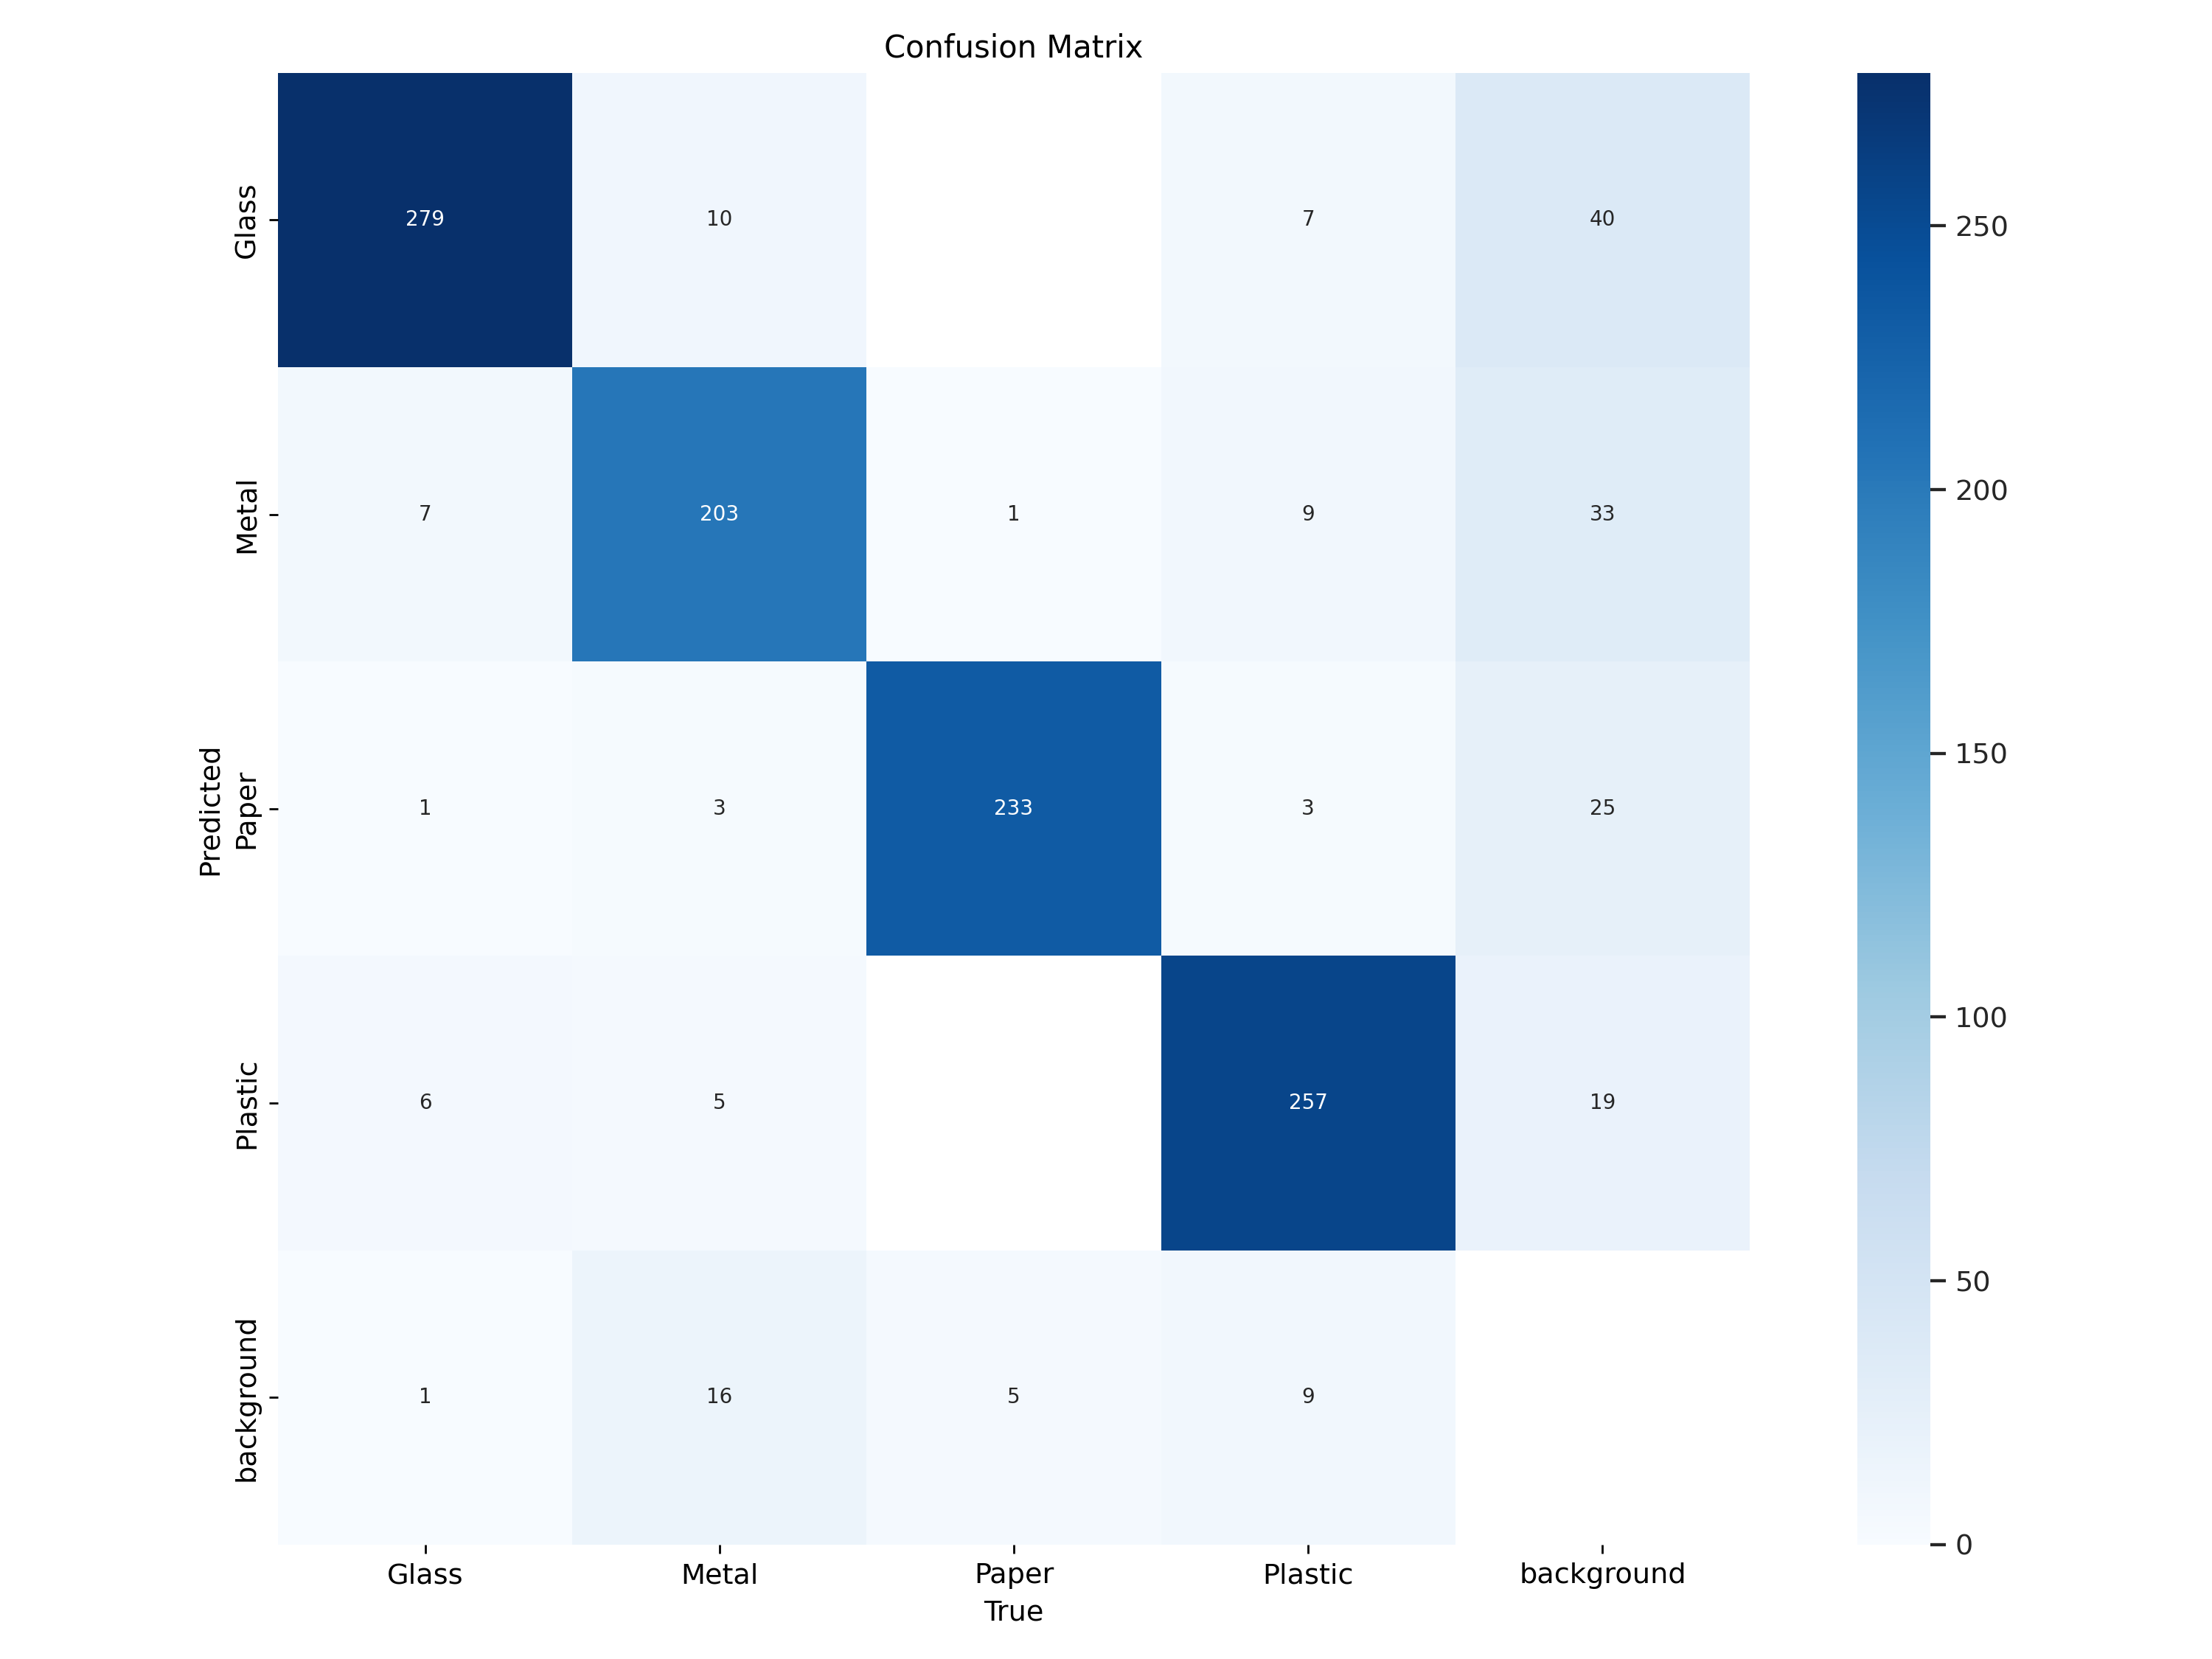

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# %cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

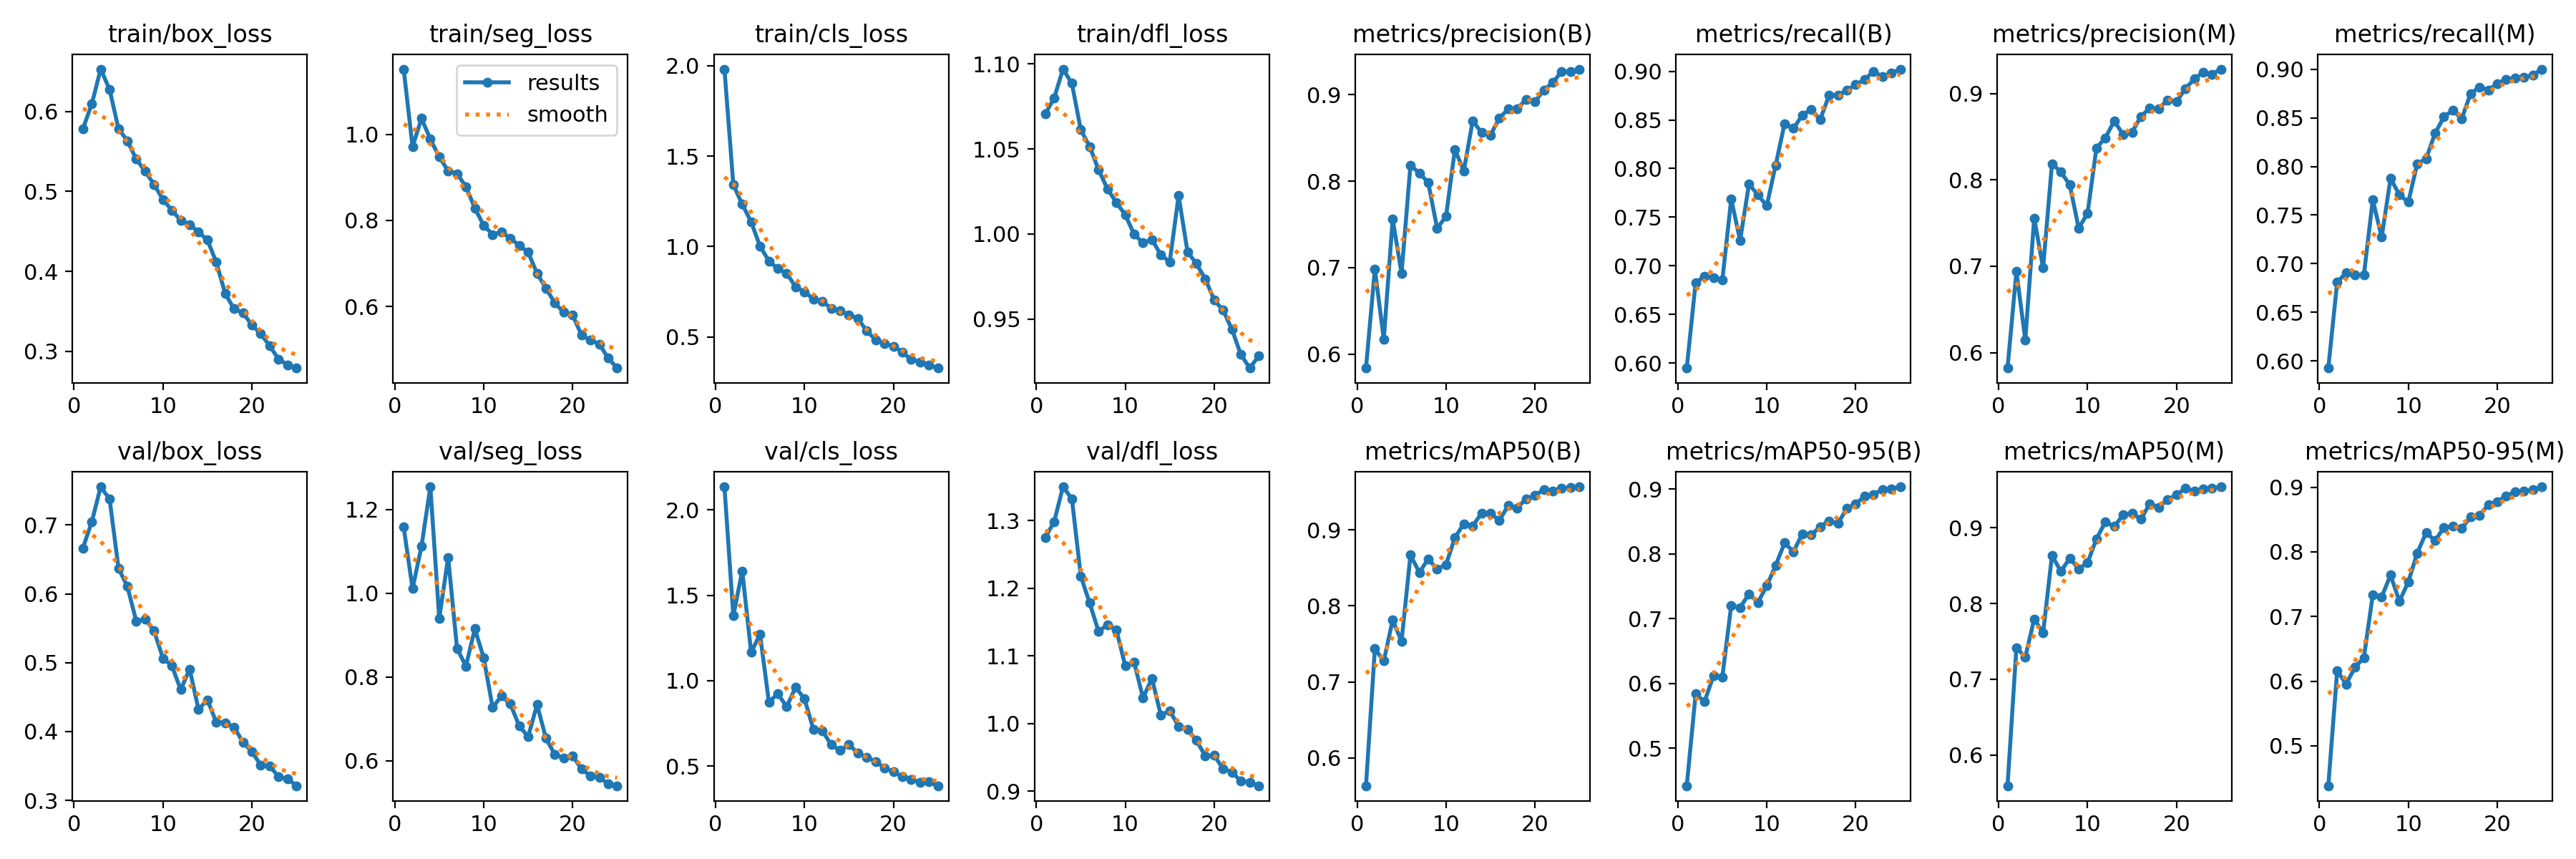

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# %cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=600)

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# %cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml


Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/TrashFinal-1/valid/labels.cache... 815 images, 9 backgrounds, 0 corrupt: 100% 815/815 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 51/51 [00:19<00:00,  2.64it/s]
                   all        815       1055       0.93      0.902      0.956      0.904      0.929        0.9      0.954        0.9
                 Glass        815        294      0.939      0.936      0.981      0.931      0.939      0.935      0.981      0.923
                 Metal        815        237      0.898      0.852      0.923      0.891      0.897      0.848      0.917      0.885
                 Paper        815        239      0.949      0.933      0.974      0.919      0.949      0.932      0.974      0.927

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
# %cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs

image 1/409 /content/TrashFinal-1/test/images/brown-glass114_jpg.rf.08bcb3ea3201996a1e786ecb1bb824e3.jpg: 640x640 1 Glass, 1 Metal, 15.3ms
image 2/409 /content/TrashFinal-1/test/images/brown-glass16_jpg.rf.64c11e9f104160058caf6269ed8f63c8.jpg: 640x640 1 Glass, 10.9ms
image 3/409 /content/TrashFinal-1/test/images/brown-glass179_jpg.rf.7dd1f4e47527ce71a5ea4cf841077f77.jpg: 640x640 1 Glass, 10.6ms
image 4/409 /content/TrashFinal-1/test/images/brown-glass268_jpg.rf.5712d57ae0b4c3a6145433aca1ff1476.jpg: 640x640 1 Glass, 10.3ms
image 5/409 /content/TrashFinal-1/test/images/brown-glass30_jpg.rf.fb40af64daa89d20ac22622c7087a75b.jpg: 640x640 4 Glasss, 10.1ms
image 6/409 /content/TrashFinal-1/test/images/brown-glass369_jpg.rf.c56085b191f6d057d448d2a197ba6c3a.jpg: 640x640 1 Glass, 11.2ms
image 7/409 /content/TrashFinal-1/test

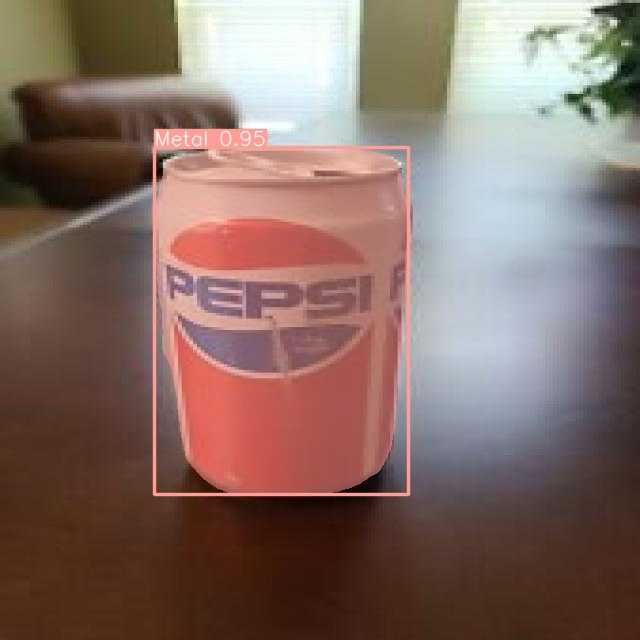

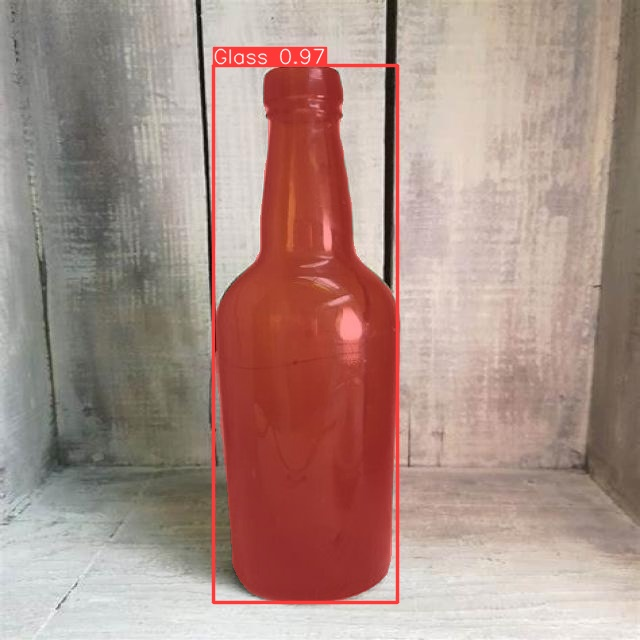

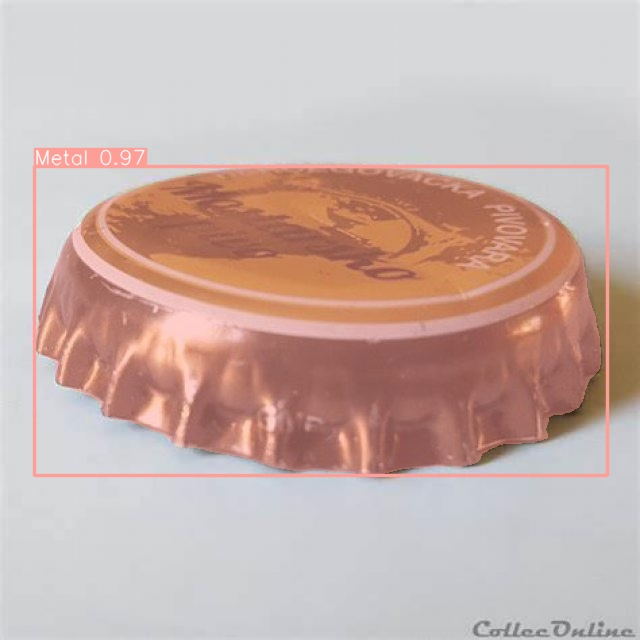

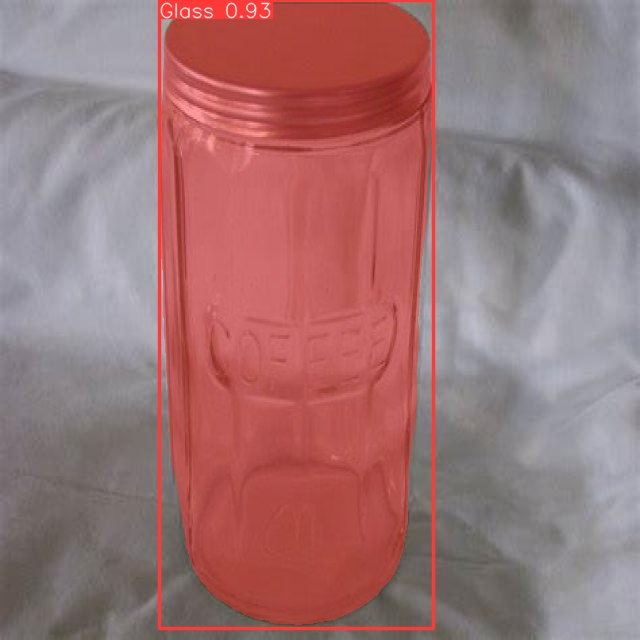

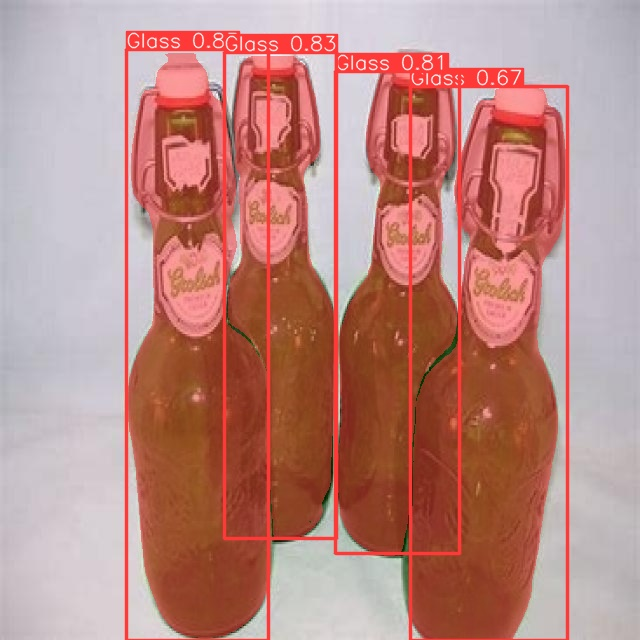

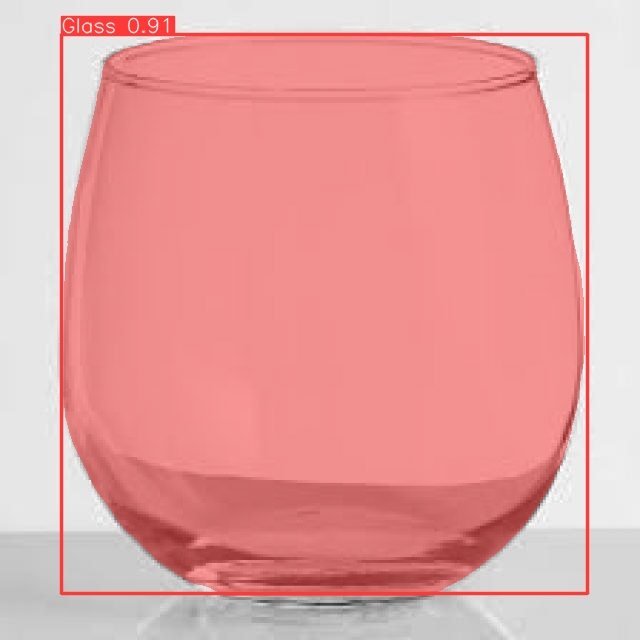

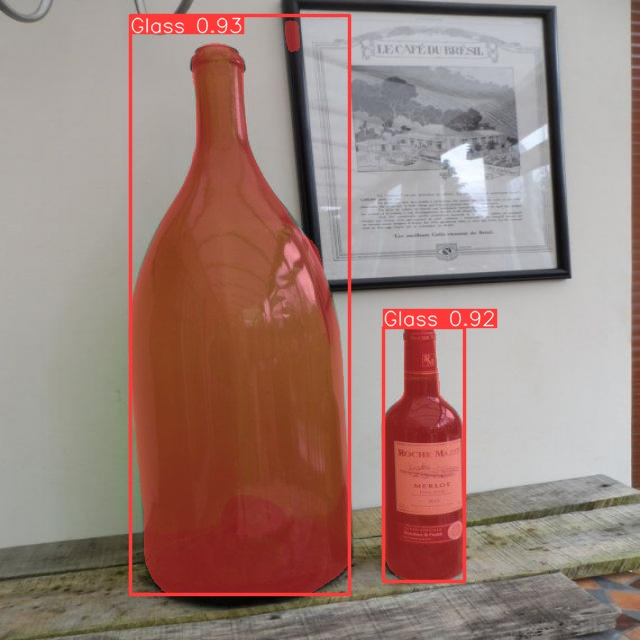

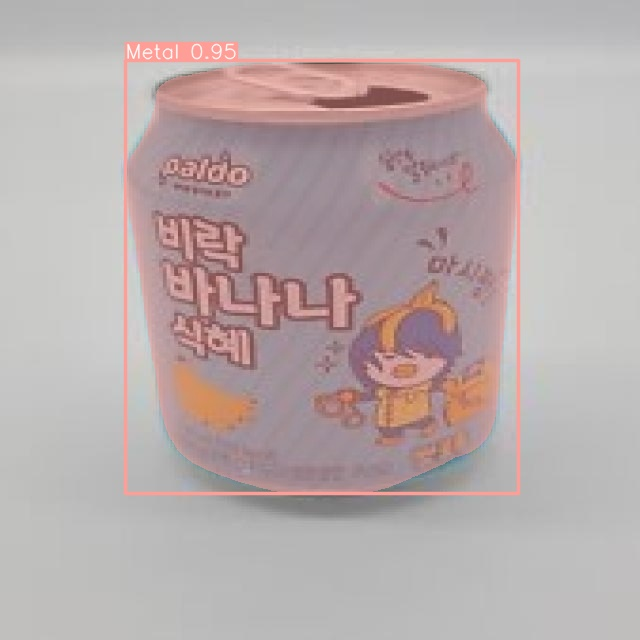

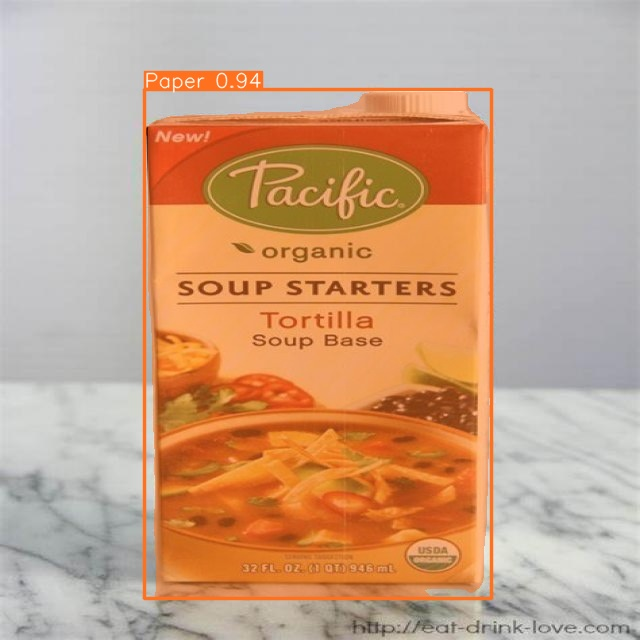

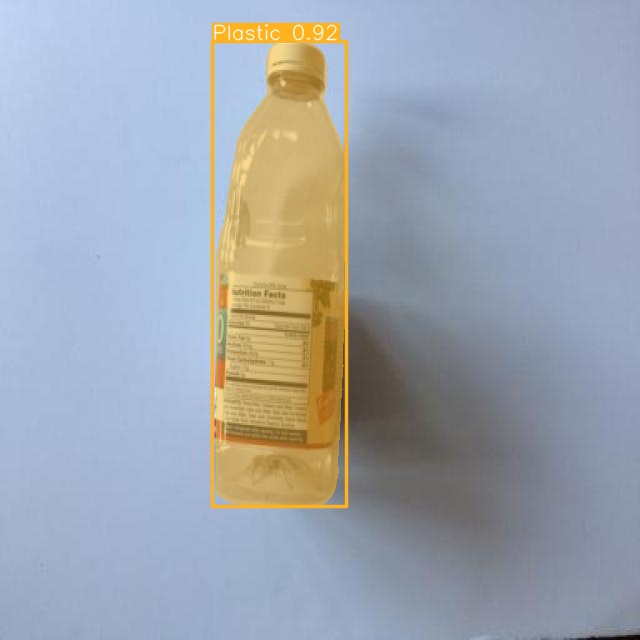

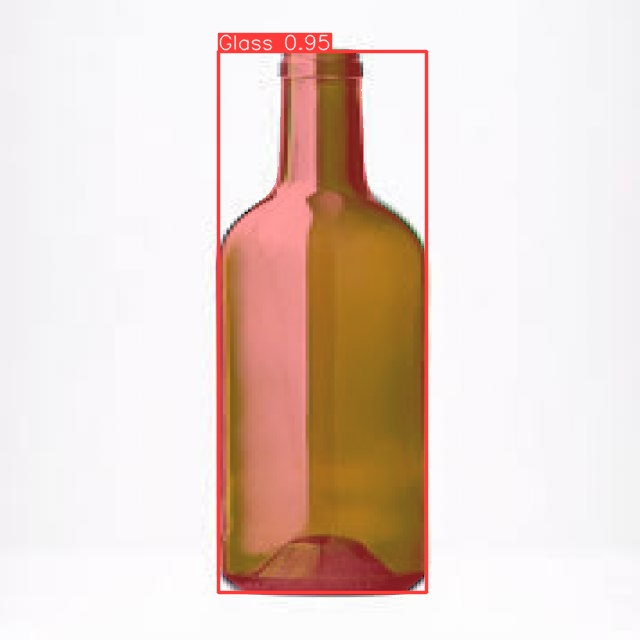

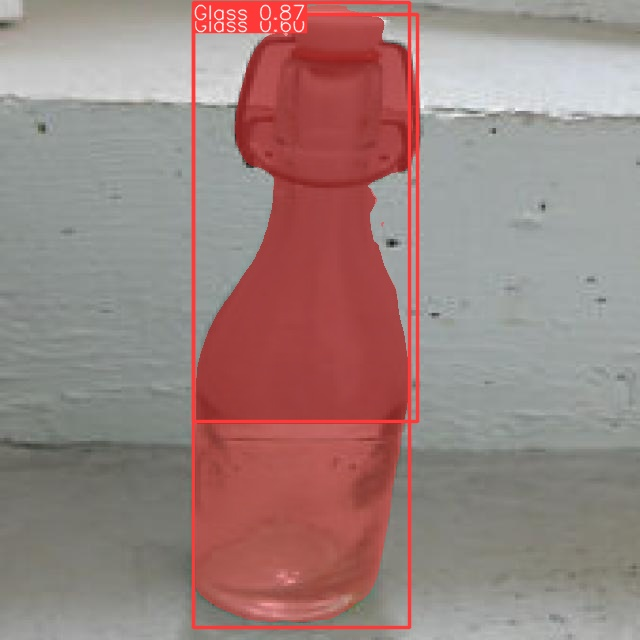

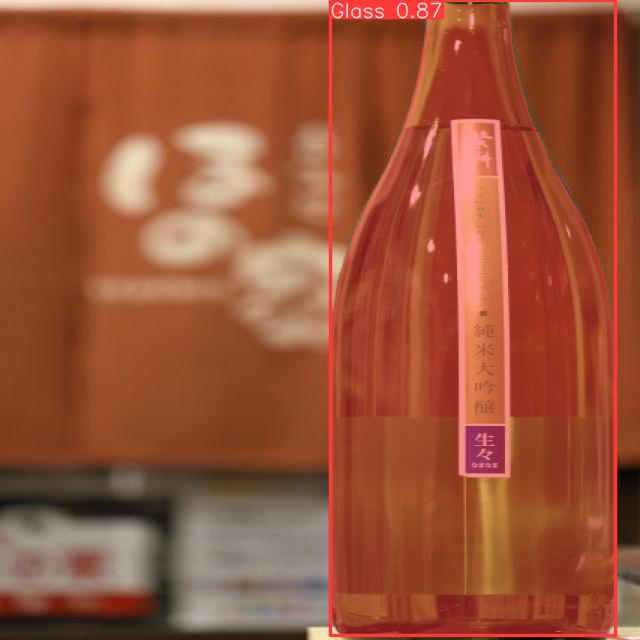

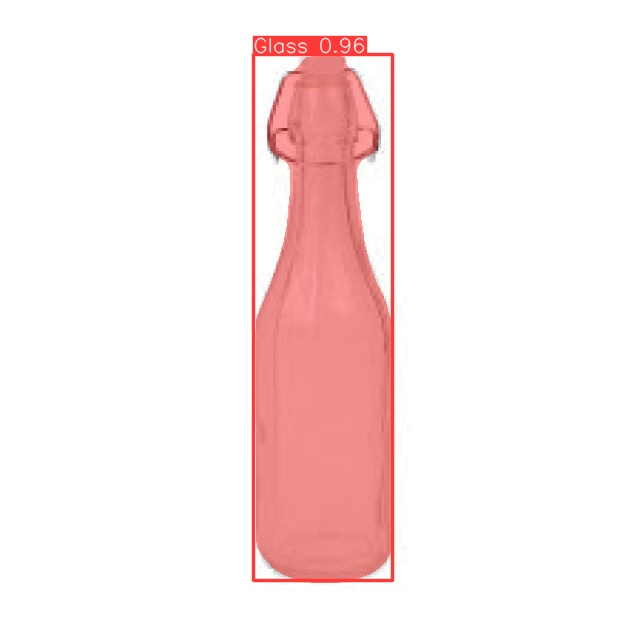

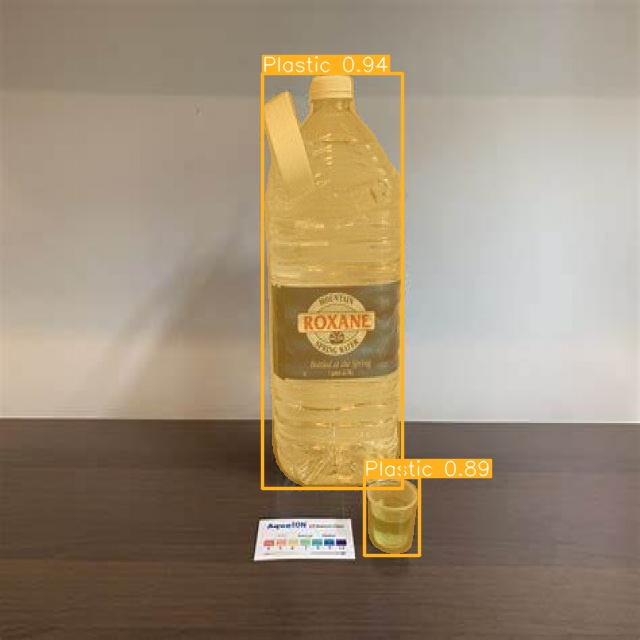

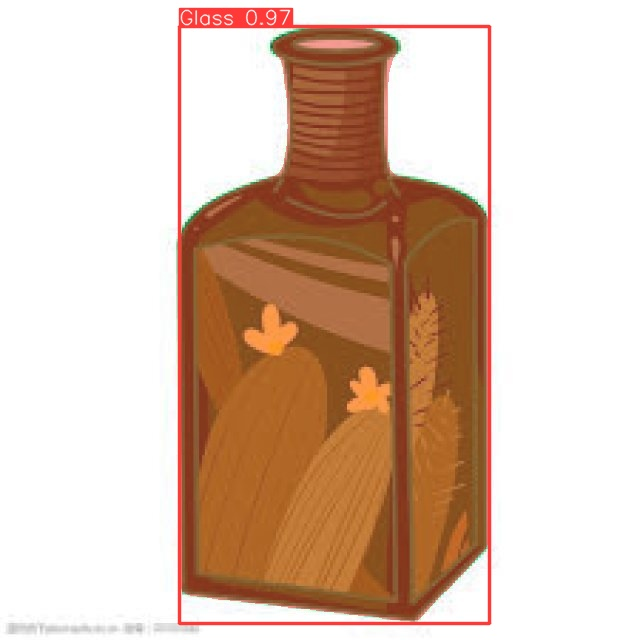

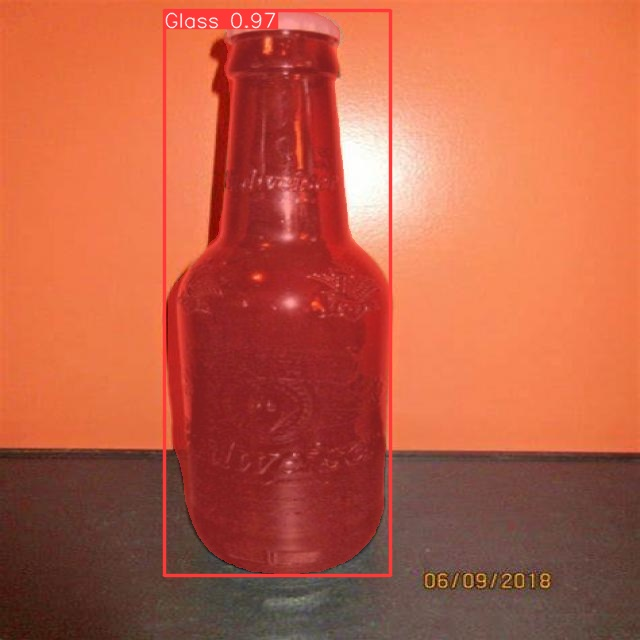

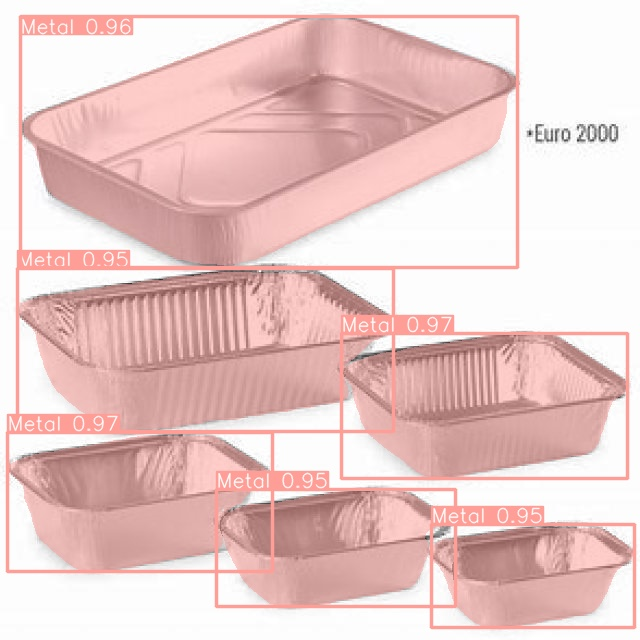

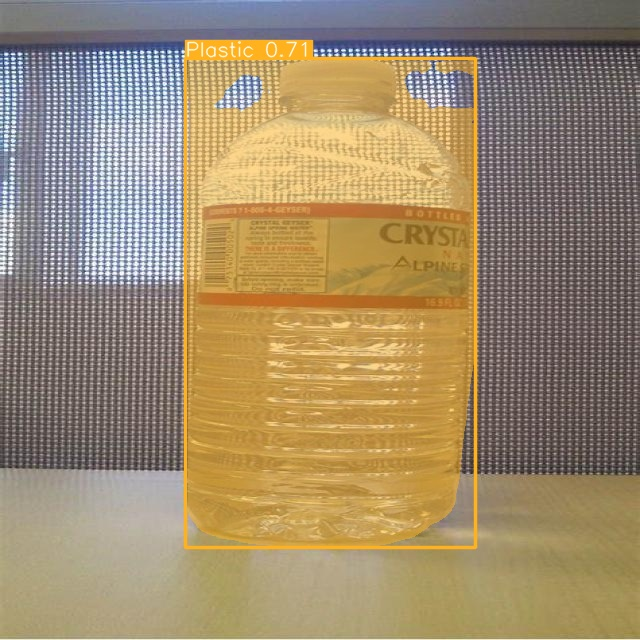

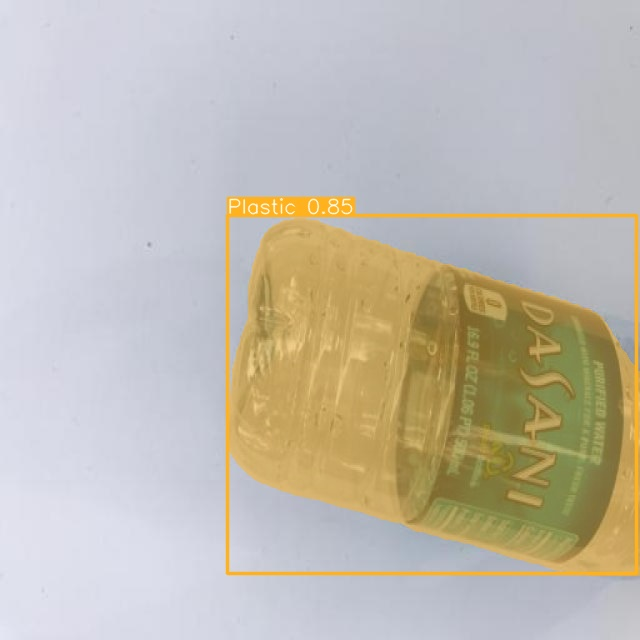

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")